In [ ]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)
dataset=pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\train.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

In [9]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

In [ ]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

In [20]:
import pandas as pd
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load datasets
logging.info("Loading datasets...")
train_data = pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\train.csv')
store_data = pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\store.csv')
test_data = pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\test.csv')
sample_submission_data = pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\sample_submission.csv')

# Inspect datasets
logging.info("Inspecting datasets...")
print(train_data.head())
print(store_data.head())
print(test_data.head())
print(sample_submission_data.head())

# Merge train_data with store_data
logging.info("Merging train data with store data...")
train_merged = pd.merge(train_data, store_data, on='Store', how='left')

# Merge test_data with store_data
logging.info("Merging test data with store data...")
test_merged = pd.merge(test_data, store_data, on='Store', how='left')

# Save merged datasets
train_merged.to_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\train_merged.csv', index=False)
test_merged.to_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\test_merged.csv', index=False)

logging.info("Merged datasets saved successfully.")


2025-01-03 14:49:08,254 - INFO - Loading datasets...


C:\Users\kingsta\AppData\Local\Temp\ipykernel_13888\2318467345.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\train.csv')
2025-01-03 14:49:09,669 - INFO - Inspecting datasets...
2025-01-03 14:49:09,703 - INFO - Merging train data with store data...


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4     

2025-01-03 14:49:10,292 - INFO - Merging test data with store data...
2025-01-03 14:49:27,491 - INFO - Merged datasets saved successfully.


In [21]:
logging.info("Inspecting missing values...")
train_merged_data = pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\train_merged.csv')
test_merged_data = pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\test_merged.csv')


print(train_merged_data.isnull().sum())
print(test_merged_data.isnull().sum())


2025-01-03 15:04:06,113 - INFO - Inspecting missing values...
C:\Users\kingsta\AppData\Local\Temp\ipykernel_13888\507632285.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_merged_data = pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\train_merged.csv')
C:\Users\kingsta\AppData\Local\Temp\ipykernel_13888\507632285.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  test_merged_data = pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\test_merged.csv')


Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64
Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment              

In [28]:
# Handle missing values in train data
logging.info("Handling missing values in train data...")
train_merged_data['CompetitionDistance'].fillna(train_merged_data['CompetitionDistance'].median(), inplace=True)
train_merged_data['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
train_merged_data['CompetitionOpenSinceYear'].fillna(0, inplace=True)
train_merged_data['Promo2SinceWeek'].fillna(0, inplace=True)
train_merged_data['Promo2SinceYear'].fillna(0, inplace=True)
train_merged_data['PromoInterval'].fillna('Unknown', inplace=True)

# Handle missing values in test data
logging.info("Handling missing values in test data...")
test_merged_data['Open'].fillna(1, inplace=True)
test_merged_data['CompetitionDistance'].fillna(test_merged_data['CompetitionDistance'].median(), inplace=True)
test_merged_data['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
test_merged_data['CompetitionOpenSinceYear'].fillna(0, inplace=True)
test_merged_data['Promo2SinceWeek'].fillna(0, inplace=True)
test_merged_data['Promo2SinceYear'].fillna(0, inplace=True)
test_merged_data['PromoInterval'].fillna('Unknown', inplace=True)

# Verify missing values are handled
logging.info("Verifying missing values...")
print(train_merged.isnull().sum())
print(test_merged.isnull().sum())

# Save cleaned train data
train_merged_data.to_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\cleaned_train_merged.csv', index=False)
logging.info("Cleaned train data saved as 'cleaned_train_merged.csv'.")

# Save cleaned test data
test_merged_data.to_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\cleaned_test_merged.csv', index=False)
logging.info("Cleaned test data saved as 'cleaned_test_merged.csv'.")



2025-01-03 15:43:09,239 - INFO - Handling missing values in train data...
C:\Users\kingsta\AppData\Local\Temp\ipykernel_13888\2997292922.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_merged_data['CompetitionDistance'].fillna(train_merged_data['CompetitionDistance'].median(), inplace=True)
C:\Users\kingsta\AppData\Local\Temp\ipykernel_13888\2997292922.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pan

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64
Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                    

2025-01-03 15:43:16,094 - INFO - Cleaned train data saved as 'cleaned_train_merged.csv'.
2025-01-03 15:43:16,374 - INFO - Cleaned test data saved as 'cleaned_test_merged.csv'.


In [29]:
cleaned_test_merged = pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\cleaned_test_merged.csv')
cleaned_train_merged = pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\cleaned_train_merged.csv')


print(train_merged_data.isnull().sum())
print(test_merged_data.isnull().sum())


C:\Users\kingsta\AppData\Local\Temp\ipykernel_13888\2553109471.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_test_merged = pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\cleaned_test_merged.csv')
C:\Users\kingsta\AppData\Local\Temp\ipykernel_13888\2553109471.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_train_merged = pd.read_csv(r'C:\Users\kingsta\Desktop\week-\10_ACADAMY_KAIM_W4\task_1\data\cleaned_train_merged.csv')


Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64
Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                    

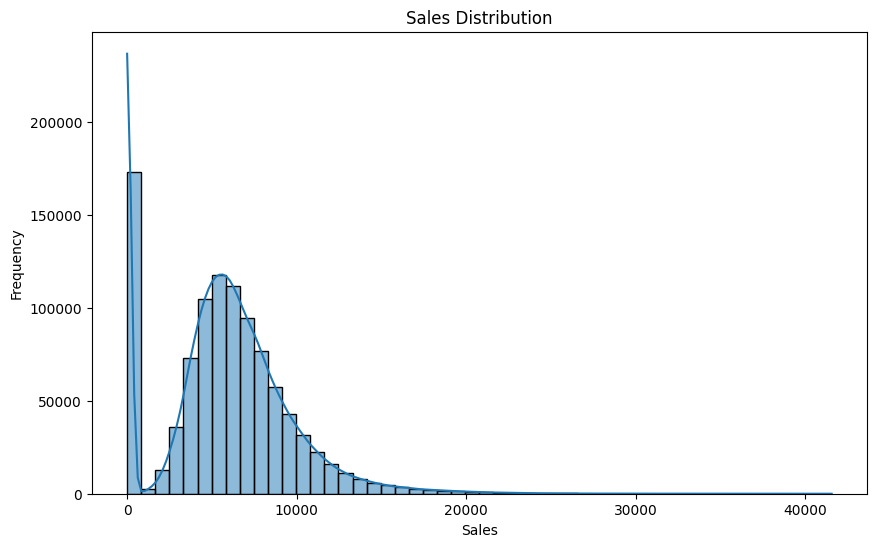

In [ ]:
# Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_train_merged['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()
 

2025-01-03 15:56:50,869 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 15:56:51,381 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


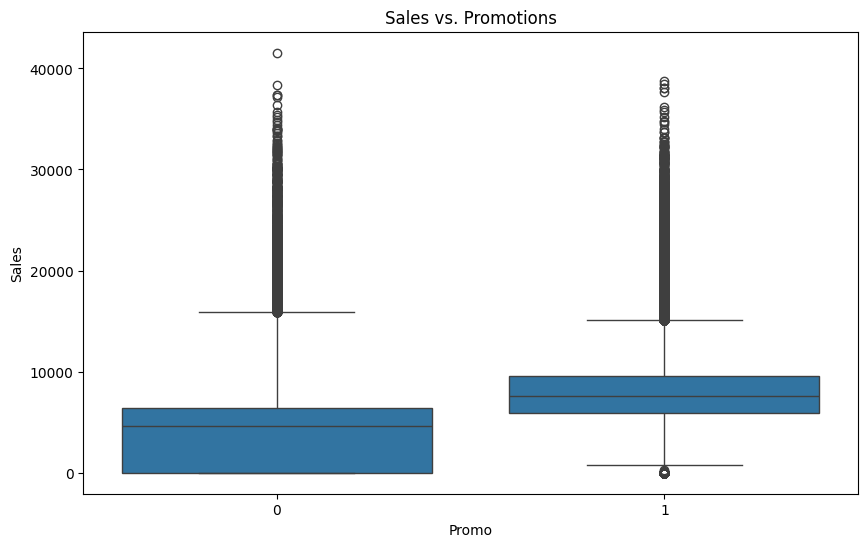

In [32]:
# Sales during promotions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=train_merged)
plt.title("Sales vs. Promotions")
plt.xlabel("Promo")
plt.ylabel("Sales")
plt.show()


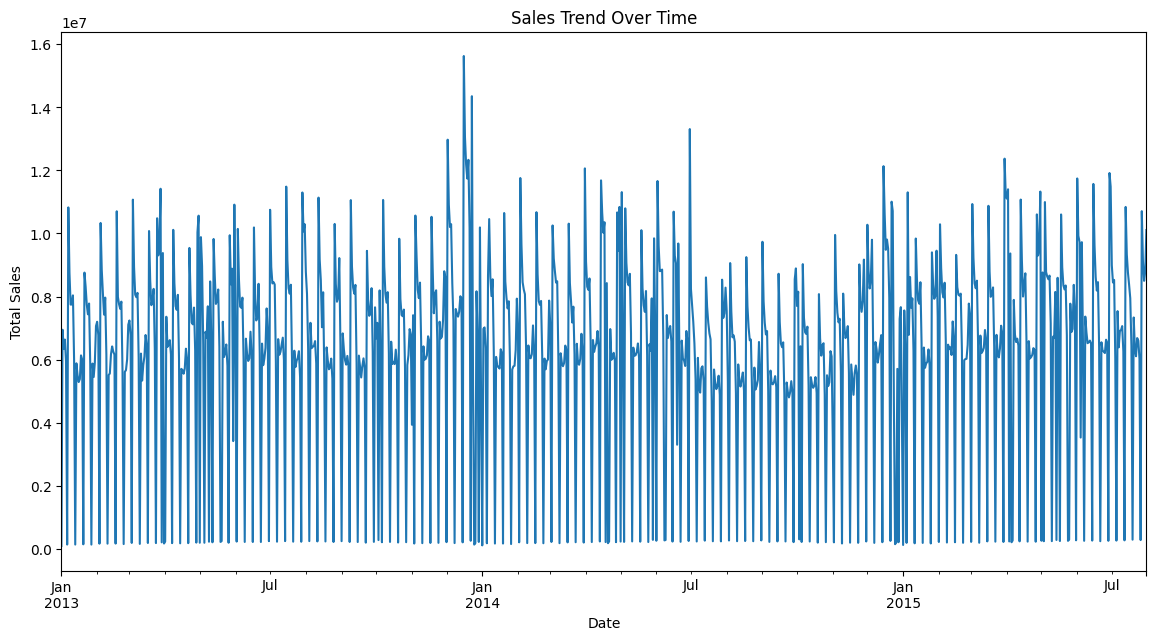

In [33]:
# Convert Date column to datetime
train_merged['Date'] = pd.to_datetime(train_merged['Date'])

# Sales trend over time
plt.figure(figsize=(14, 7))
train_merged.groupby('Date')['Sales'].sum().plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


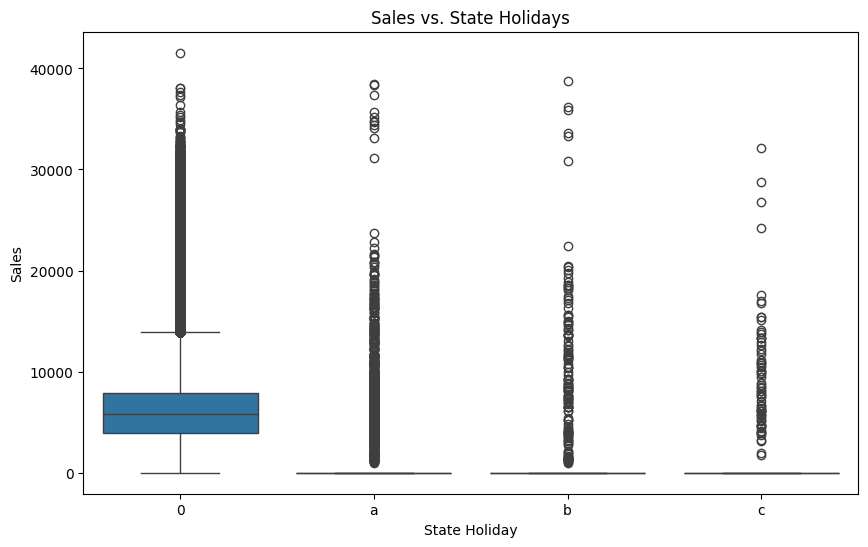

In [34]:
# Sales during holidays
plt.figure(figsize=(10, 6))
sns.boxplot(x='StateHoliday', y='Sales', data=train_merged)
plt.title("Sales vs. State Holidays")
plt.xlabel("State Holiday")
plt.ylabel("Sales")
plt.show()


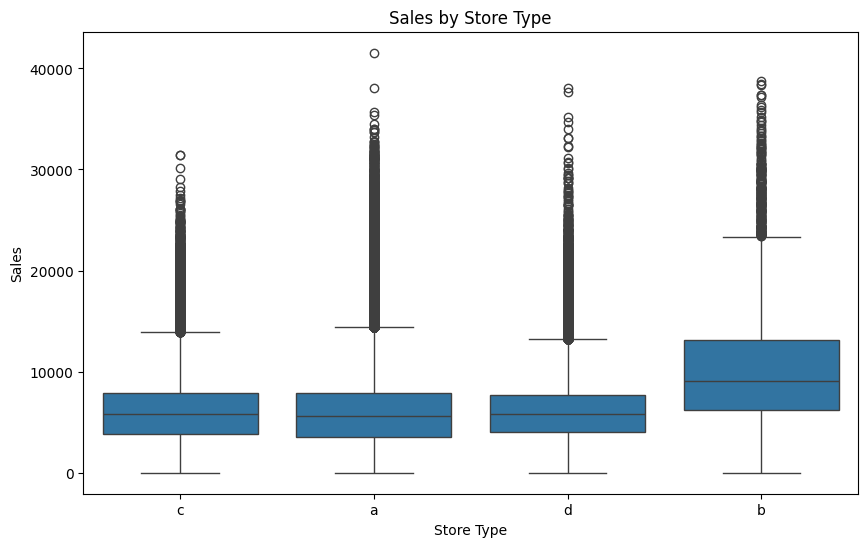

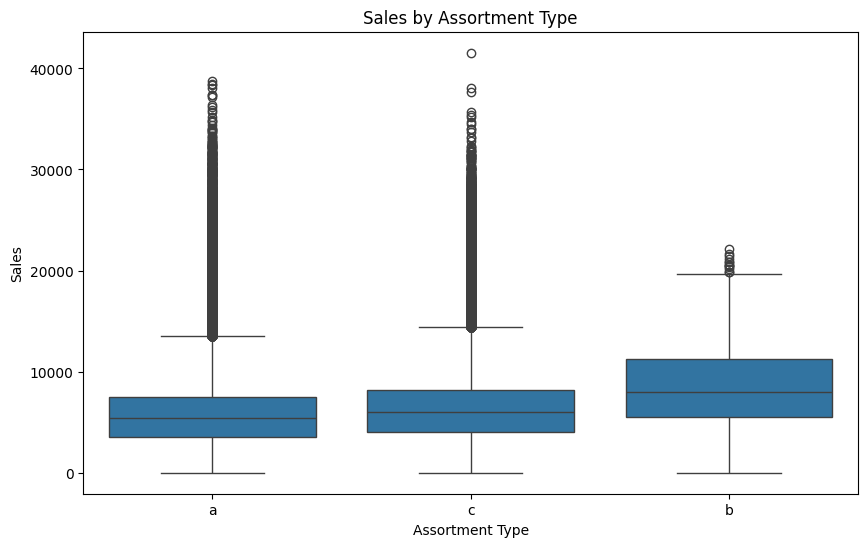

In [35]:
# Sales by store type
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='Sales', data=train_merged)
plt.title("Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Sales")
plt.show()

# Sales by assortment type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Assortment', y='Sales', data=train_merged)
plt.title("Sales by Assortment Type")
plt.xlabel("Assortment Type")
plt.ylabel("Sales")
plt.show()
